In [1]:
import pandas as pd
from collections import defaultdict
import re
import numpy as np
import sys
sys.path.insert(0, '../../base_codes')
sys.path.insert(0, '../../data_specific_codes')
sys.path.insert(0, '../../utility_codes')

#%run -i 'parameters'
#%run -i 'main_functions'
#%run -i 'utility_functions'

from RE_init import *
from main_functions import *
from utility_functions import *

##MICE_AND_MEN
#based_dir = '../../../../data/GoodReads/revised_pronoun_1Jun2017/results/Mice_and_men/'
#file_input_name = 'mice_and_men0601_relations_-1.csv'
#input_name_prefix = 'mice_and_men'
#DATA_SET = 'goodreads-Mice-and-men'

##HOBBIT
#based_dir = '../../../../data/GoodReads/revised_pronoun_1Jun2017/results/Hobbit/'
#file_input_name= 'hobbit0601_relations_-1.csv'
#input_name_prefix = 'hobbit'
#DATA_SET = 'goodreads-Hobbit'

##Mockingbird
#based_dir = '../../../../data/GoodReads/revised_pronoun_1Jun2017/results/Mockingbird/'
#file_input_name = 'mockingbird0601_relations_-1.csv'
#input_name_prefix = 'mockingbird'
#DATA_SET = 'goodreads-Mockingbird'

#Frankenstein
based_dir = '../../../../data/GoodReads/revised_pronoun_1Jun2017/results/Frankenstein/'
file_input_name = 'frankenstein0601_relations_-1.csv'
input_name_prefix = 'frankenstein'
DATA_SET = 'goodreads-Frankenstein'

def read_df_rel(based_dir, file_input_name):
    file_input = based_dir + file_input_name    
    ff = open(file_input)
    delim=","
    df = pd.read_csv(file_input,delimiter=delim,header=0)        
    return df

df_rels = read_df_rel(based_dir, file_input_name)

In [4]:
df_entity_rankings = get_top_entities(df_rels, 
                 #output_file='../../../../data/GoodReads/Hobbit-Pronoun_subjobj_entity_rankings.csv'
                    output_file=based_dir+ input_name_prefix+ '0601_subjobj_entity_rankings.csv'
                 , top_num=-1, save_to_file=True)

In [5]:
print_full(df_entity_rankings)

                                                 entity  frequency
0                                                   {I}       2748
1                                        {Frankenstein}        561
2                                                  {it}        443
3                                                 {you}        437
4                                           this {book}        399
5                                                {what}        378
6                                                  {he}        326
7                                                  {'t}        311
8                                              {Victor}        307
9                                         the {monster}        263
10                                                 {me}        255
11                                               {this}        221
12                                Victor {Frankenstein}        203
13                                                 {we}       

In [13]:
'''
def save_pairwise_relations_with_node_selection(df_rels,entity_versions,output_file):
    f = open(output_file, 'w')
    cnt = Counter()
    for entity in entity_versions:
        print >>f, "-------------------------"
        print >>f, "       ", entity
        print >>f, "-------------------------"    
        for ent_one_version in entity_versions[entity]:
            print >>f, "\n\n**** ", ent_one_version, " ****"
            df_all_versions = defaultdict(list)
            df_one_version = df_rels[np.logical_or(df_rels['arg1'].str.contains(ent_one_version),df_rels['arg2'].str.contains(ent_one_version))]
            list_one_version = df_one_version['rel'].tolist()
            for r in list_one_version:
                cnt[r] += 1
            print >>f, "Frequent relations:"
            for letter,count in cnt.most_common():
                print >>f, letter, ": ", count  
'''                

In [2]:
entity_versions = get_entity_versions(DATA_SET)
print entity_versions
#df_simp = get_simp_df(df_rels.copy(),entity_versions)
#ent_medicals = entity_versions['medical prof']
#output_file = '../../../../data/GoodReads/Frankenstein/Frankenstein-Pronoun_selected_nodes_pairwise_rels.txt'
#save_pairwise_relations_with_node_selection(df_rels,entity_versions,output_file)
print "done"

defaultdict(<type 'list'>, {'life': ['life', 'lifes', 'life.'], 'novel': ['novel', 'novelization', 'stori', 'stories', 'tale', 'story', 'book'], 'monster': ['monster', 'monsters', 'monsterous', 'creature', 'creatures', 'creation', 'creations'], '2nd creature': ['new creature', 'second creature', '2nd creature', 'another creature'], 'god': ['creator', 'creators', 'god'], 'elizabeth': ['elizabeth', 'wife'], 'doctor': ['doctor'], 'revenge': ['revenge', 'reveng'], 'walton': ['walton', 'robert', 'robert walton'], 'death': ['death', 'deaths'], 'human': ['human', 'humane', 'humanity', 'humans', 'humanness'], 'henry': ['henry', 'clerval', 'henry clerval'], 'frankenstein': ['frankenstein', 'frankensteins', 'victor', 'victors', 'victor_frankenstein', 'victor_frankensteins', 'victor frankenstein'], 'letter': ['letter', 'letters'], 'mary shelley': ['mary_shellei', 'mary_shelley', 'mary', 'shellei', 'shelley', 'mary shellei', 'mary shelley', 'author'], 'dracula': ['dracula'], 'man': ['man', 'mans']

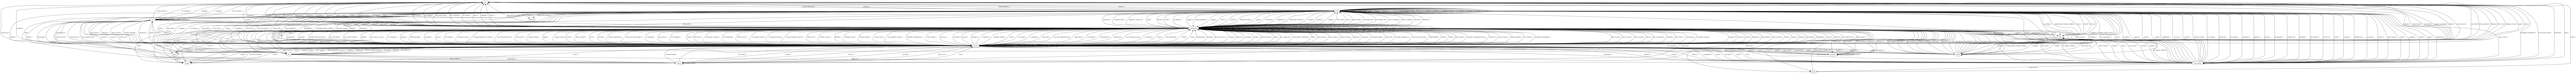

life novel {0: {'label': 'greatly {influenced}-1'}}
life monster {0: {'label': '{unfold}-1'}}
life mary shelley {0: {'label': 'thoroughly {entertained}-1'}}
novel life {0: {'label': '{features}-1'}, 1: {'label': '{had} relentlessly-1'}, 2: {'label': '{follows}-1'}}
novel monster {0: {'label': '{describes}-1'}, 1: {'label': '{brings}-1'}}
novel dracula {0: {'label': '{predates}-1'}, 1: {'label': 'perhaps later {inspired}-1'}}
novel walton {0: {'label': '{needs}-1'}}
novel human {0: {'label': '{depicts}-1'}, 1: {'label': '{makes}-1'}, 2: {'label': '{presented}-1'}}
novel god {0: {'label': 'still {manages}-1'}}
novel frankenstein {0: {'label': 'perhaps {parallels}-1'}, 1: {'label': '{taught}-1'}, 2: {'label': '{shows}-1'}, 3: {'label': '{named}-1'}}
novel letter {0: {'label': 'actually aboard {writing} suddenly-1'}}
novel mary shelley {0: {'label': '{ensured}-1'}, 1: {'label': '{Written} ago-1'}}
novel man {0: {'label': '{creates}-1'}}
monster life {0: {'label': 'is {terrorizing}-2'}, 1: 

In [3]:
rels_to_network(df_rels,
                input_fname=input_name_prefix,
                output_dir_arg=based_dir,
                MAX_ITERATION=-1,
                NODE_SELECTION=True,
                DATA_SET=DATA_SET,
                SAVE_GEFX=True,
                SAVE_PAIRWISE_RELS=True,
                SHOW_ARGUMENT_GRAPH=True,
                SAVE_G_JSON=True,
                SAVE_DF_SELECTED=True)